# Computer storage and arithmetics



## Units of computer storage: 

* `bit` = `binary` + `digit` (coined by statistician [John Tukey](https://en.wikipedia.org/wiki/Bit#History)).  
* `byte` = 8 bits.  
* KB = kilobyte = $10^3$ bytes.  
* MB = megabytes = $10^6$ bytes.  
* GB = gigabytes = $10^9$ bytes. Typical RAM size.  
* TB = terabytes = $10^{12}$ bytes. Typical hard drive size. Size of NYSE each trading session.    
* PB = petabytes = $10^{15}$ bytes.  
* EB = exabytes = $10^{18}$ bytes. Size of all healthcare data in 2011 is ~150 EB.    
* ZB = zetabytes = $10^{21}$ bytes. 

Julia function `Base.summarysize` shows the amount of memory (in bytes) used by an object.

In [1]:
x = rand(100, 100)
Base.summarysize(x)

80000

## Storage of Characters

* Plain text files are stored in the form of characters: `.jl`, `.r`, `.c`, `.cpp`, `.tex`, `.html`, ...  
* ASCII (American Code for Information Interchange): 7 bits, only $2^7=128$ characters.  

In [2]:
# integers 0, 1, ..., 127 and corresponding ascii character
[0:127 Char.(0:127)]

128×2 Array{Any,2}:
   0  '\0'  
   1  '\x01'
   2  '\x02'
   3  '\x03'
   4  '\x04'
   5  '\x05'
   6  '\x06'
   7  '\a'  
   8  '\b'  
   9  '\t'  
  10  '\n'  
  11  '\v'  
  12  '\f'  
   ⋮        
 116  't'   
 117  'u'   
 118  'v'   
 119  'w'   
 120  'x'   
 121  'y'   
 122  'z'   
 123  '{'   
 124  '|'   
 125  '}'   
 126  '~'   
 127  '\x7f'

* Extended ASCII: 8 bits, $2^8=256$ characters.  

In [3]:
# integers 128, 129, ..., 255 and corresponding extended ascii character
[128:255 Char.(128:255)]

128×2 Array{Any,2}:
 128  '\u80'
 129  '\u81'
 130  '\u82'
 131  '\u83'
 132  '\u84'
 133  '\u85'
 134  '\u86'
 135  '\u87'
 136  '\u88'
 137  '\u89'
 138  '\u8a'
 139  '\u8b'
 140  '\u8c'
   ⋮        
 244  'ô'   
 245  'õ'   
 246  'ö'   
 247  '÷'   
 248  'ø'   
 249  'ù'   
 250  'ú'   
 251  'û'   
 252  'ü'   
 253  'ý'   
 254  'þ'   
 255  'ÿ'   

* Unicode: UTF-8, UTF-16 and UTF-32 support many more characters including foreign characters; last 7 digits conform to ASCII. [UTF-8](https://en.wikipedia.org/wiki/UTF-8) is the current dominant character encoding on internet.  

<img src="https://upload.wikimedia.org/wikipedia/commons/c/c4/Utf8webgrowth.svg" width=500 align="center"/>

Julia supports the full range of UTF-8 characters. You can type many Unicode math symbols by typing the backslashed LaTeX symbol name followed by tab. 

In [4]:
# \beta-<tab>
β = 0.0
# \beta-<tab>-\hat-<tab>
β̂ = 0.0

0.0

## Fixed-point number system

* Fixed-point number system $\mathbb{I}$ is a computer model for integers $\mathbb{Z}$. 

* The number of bits and method of representing negative numbers vary from system to system. 
    - The `integer` type in R has $M=32$ bits. 
    - Matlab has `(u)int8`, `(u)int16`, `(u)int32`, `(u)int64`.  
    - Julia has even more integer types. Using Tom Breloff's `Plots.jl` and `PlotRecipes.jl` packages, we can easily [visualize the type tree](http://www.breloff.com/Graphs/) under `Integer`
    - Storage for a `Signed` or `Unsigned` integer can be $M = 8, 16, 32, 64$ or 128 bits.


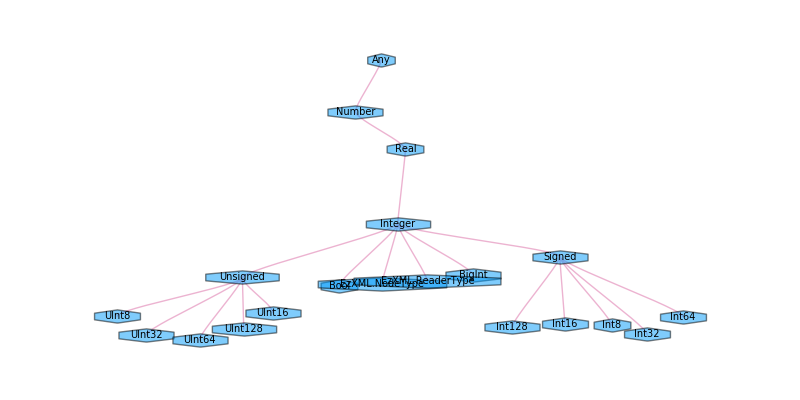

sys:1: MatplotlibDeprecationWarning: The set_axis_bgcolor function was deprecated in version 2.0. Use set_facecolor instead.


In [5]:
using PlotRecipes
pyplot(alpha=0.5, size=(800, 400))

# make a list of a type T and it's supertypes
T = Integer
sups = [T]
sup = T
while sup != Any
    sup = supertype(sup)
    unshift!(sups, sup)
end
sups

# recursively build a graph of subtypes of T
n = length(sups)
nodes, source, destiny = copy(sups), collect(1:n-1), collect(2:n)
function add_subs!(T, supidx)
    for sub in subtypes(T)
        push!(nodes, sub)
        subidx = length(nodes)
        push!(source, supidx)
        push!(destiny, subidx)
        add_subs!(sub, subidx)
    end
end
add_subs!(T, n)
names = map(string, nodes)

graphplot(source, destiny, names=names, method=:tree)

### Signed integers

* First bit indicates sign.  
    - `0` for nonnegative numbers
    - `1` for negative numbers  
    
* **Two's complement representation** for negative numbers. 
    - Sign bit is set to 1  
    - remaining bits are set to opposite values  
    - 1 is added to the result

In [6]:
@show bits(Int8(18))
@show bits(Int8(-18));

bits(Int8(18)) = "00010010"
bits(Int8(-18)) = "11101110"


* Two's complement representation respects modular arithmetic nicely. 
    - addition of any two signed integers are just bitwise addition, possibly modulo $2^M$
    
<img src="http://users.dickinson.edu/~braught/courses/cs251f02/classes/images/twosCompWheel.png" width="400" align="center"/>    

* **Range** of representable integers by $M$-bit **signed integer** is $[-2^{M-1},2^{M-1}-1]$.
    - Julia functions `typemin(T)` and `typemax(T)` give the lowest and highest representable number of a type `T` respectively

In [7]:
for t in [Int8 Int16 Int32 Int64 Int128]
    println(t, '\t', typemin(t), '\t', typemax(t))
end

Int8	-128	127
Int16	-32768	32767
Int32	-2147483648	2147483647
Int64	-9223372036854775808	9223372036854775807
Int128	-170141183460469231731687303715884105728	170141183460469231731687303715884105727


### **Unsigned integers**

* For unsigned integers, the range is $[0,2^M-1]$.

In [8]:
for t in [UInt8 UInt16 UInt32 UInt64 UInt128]
    println(t, '\t', typemin(t), '\t', typemax(t))
end

UInt8	0	255
UInt16	0	65535
UInt32	0	4294967295
UInt64	0	18446744073709551615
UInt128	0	340282366920938463463374607431768211455


## `BigInt`

Julia `BigInt` type is arbitrary precision.

In [9]:
@show typemax(Int128)
@show typemax(Int128) + 1 # modular arithmetic!
@show BigInt(typemax(Int128)) + 1

typemax(Int128) = 170141183460469231731687303715884105727
typemax(Int128) + 1 = -170141183460469231731687303715884105728
BigInt(typemax(Int128)) + 1 = 170141183460469231731687303715884105728


170141183460469231731687303715884105728

## Overflow and underflow for integer arithmetic

R reports `NA` for integer overflow and underflow.  
Julia outputs the result according to modular arithmetic.

In [10]:
@show typemax(Int32) + Int32(1)

typemax(Int32) + Int32(1) = -2147483648


-2147483648

In [11]:
using RCall

R"""
# .Machine variable
.Machine$integer.max
"""

RCall.RObject{RCall.IntSxp}
[1] 2147483647


In [12]:
R"""
M <- 32
big <- 2^(M-1) - 1
as.integer(big)
"""

RCall.RObject{RCall.IntSxp}
[1] 2147483647


In [13]:
R"""
as.integer(big+1)
"""

RCall.RObject{RCall.IntSxp}
[1] NA


## Floating-number system

Floating-point number system is a computer model for real numbers $\mathbb{R}$.

* Most computer systems adopts the [IEEE 754 standard](https://en.wikipedia.org/wiki/IEEE_floating_point), established in 1985, for representing real numbers.  
For the history, see an [interview with William Kahan](http://www.cs.berkeley.edu/~wkahan/ieee754status/754story.html).

* In the scientific notation, a real number is represented as
$$\pm d_0.d_1d_2 \cdots d_p \times b^e.$$
In computer, the _base_ is $b=2$ and the digits $d_i$ are 0 or 1.

* _Normalized_ vs _denormalized_ numbers. For example, decimal number 18 is
$$ +1.0010 \times 2^4 \quad (\text{normalized})$$
or, equivalently,
$$ +0.1001 \times 2^5 \quad (\text{denormalized}).$$

* In the floating-number system, computer stores 
    - sign bit  
    - the _fraction_ (or _mantissa_, or _significand_) of the normalized representation
    - the actual exponent _plus_ a bias

<img src="http://cdn.wccftech.com/wp-content/uploads/2015/02/Single-precision-and-double-precision-numbers.png" width="500" align="center"/>

* **Single precision** (32 bit = 4 bytes) 
    - First bit is sign bit  
    - $p=23$ significant bits  
    - 8 exponent bits: $e_{\max}=127$, $e_{\min}=-126$, bias=127  
    - $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers  
    - range of **magnitude**: $10^{\pm 38}$ in decimal because $\log_{10} (2^{127}) \approx 38$  
    - **precision**: $\log_{10}(2^{23}) \approx 7$ decimal point  
    - In Julia, `Float32` is the type for single precision numbers
    
* **Double precision** (64 bit = 8 bytes) 
    - First bit is sign bit  
    - $p=52$ significant bits  
    - 11 exponent bits: $e_{\max}=1023$, $e_{\min}=-1022$, bias=1023  
    - $e_{\text{min}}-1$ and $e_{\text{max}}+1$ are reserved for special numbers  
    - range of **magnitude**: $10^{\pm 308}$ in decimal because $\log_{10} (2^{1023}) \approx 308$  
    - **precision** to the $\log_{10}(2^{-52}) \approx 16$ decimal point  
    - In Julia, `Float64` is the type for double precision numbers    

In [14]:
@show bits(Float32(18))
@show bits(Float32(-18))
@show bits(Float64(18))
@show bits(Float64(18))
@show Float32(π) # SP number displays 7 digits
@show Float64(π) # DP number displays 15 digits

bits(Float32(18)) = "01000001100100000000000000000000"
bits(Float32(-18)) = "11000001100100000000000000000000"
bits(Float64(18)) = "0100000000110010000000000000000000000000000000000000000000000000"
bits(Float64(18)) = "0100000000110010000000000000000000000000000000000000000000000000"
Float32(π) = 3.1415927f0
Float64(π) = 3.141592653589793


3.141592653589793

* Special floating-point numbers. 
    - Exponent $e_{\max}+1$ plus a zero mantissa means $\pm \infty$  
    - Exponent $e_{\max}+1$ plus a nonzero mantissa means `NaN`. `NaN` could be produced from `0 / 0`, `0 * Inf`, ... In general `NaN ≠ NaN` bitwise  
    - Exponent $e_{\min}-1$ with a zero mantissa represents the real number 0  
    - Exponent $e_{\min}-1$ with a nonzero mantissa are for numbers less than $b^{e_{\min}}$  
    Numbers are _denormalized_ in the range $(0,b^{e_{\min}})$ -- **graceful underflow** 

In [15]:
@show bits(Inf32) # 18 in single precision
@show bits(-Inf32) # -18 in single precision
@show bits(Float32(0) / Float32(0)) # NaN
@show bits(Inf32 / Inf32) # NaN
@show bits(Float32(0)) # 0 in single precision 
@show nextfloat(Float32(0)) # next representable number 
@show bits(nextfloat(Float32(0))) # denormalized 

bits(Inf32) = "01111111100000000000000000000000"
bits(-Inf32) = "11111111100000000000000000000000"
bits(Float32(0) / Float32(0)) = "11111111110000000000000000000000"
bits(Inf32 / Inf32) = "11111111110000000000000000000000"
bits(Float32(0)) = "00000000000000000000000000000000"
nextfloat(Float32(0)) = 1.0f-45
bits(nextfloat(Float32(0))) = "00000000000000000000000000000001"


"00000000000000000000000000000001"

* **Rounding** is necessary whenever a number has more than $p$ significand bits. Most computer systems use the default IEEE 754 _round to nearest_ mode (also called _ties to even_ mode). Julia offers several [rounding modes](https://docs.julialang.org/en/stable/stdlib/math/?highlight=roundnearest#Base.RoundingMode), the default being `RoundNearest`. For example, the number
$$ 0.1 = 1.10011001... \times 2^{-4} $$

In [16]:
@show bits(0.1f0)
@show bits(0.1);

bits(0.1f0) = "00111101110011001100110011001101"
bits(0.1) = "0011111110111001100110011001100110011001100110011001100110011010"


* In summary
    - Single precision: range $\pm 10^{\pm 38}$ with precision up to 7 decimal digits
    - Double precision: range $\pm 10^{\pm 308}$ with precision up to 16 decimal digits  
    - The floating-point numbers do not occur uniformly over the real number line
    <img src="http://www.volkerschatz.com/science/pics/fltscale-wh.png" width="700" align="center"/>
    - **Machine epsilons** are the spacings of numbers around 1: 
    $$\epsilon_{\min}=b^{-p}, \quad  \epsilon_{\max} = b^{1-p}.$$
    <img src="./machine_epsilons.png" width="500" align="center"/>

In [17]:
@show eps(Float32)  # machine epsilon for a floating point type
@show eps(Float64)  # same as eps()
# eps(x) is the spacing after x
@show eps(100.0)
@show eps(0.0)
# nextfloat(x) and prevfloat(x) give the neighbors of x
x = 1.25f0
@show prevfloat(x), x, nextfloat(x)
@show bits(prevfloat(x)), bits(x), bits(nextfloat(x));

eps(Float32) = 1.1920929f-7
eps(Float64) = 2.220446049250313e-16
eps(100.0) = 1.4210854715202004e-14
eps(0.0) = 5.0e-324
(prevfloat(x),x,nextfloat(x)) = (1.2499999f0,1.25f0,1.2500001f0)
(bits(prevfloat(x)),bits(x),bits(nextfloat(x))) = ("00111111100111111111111111111111","00111111101000000000000000000000","00111111101000000000000000000001")


* In R, the variable `.Machine` contains numerical characteristics of the machine.

In [18]:
R"""
.Machine
"""

RCall.RObject{RCall.VecSxp}
$double.eps
[1] 2.220446e-16

$double.neg.eps
[1] 1.110223e-16

$double.xmin
[1] 2.225074e-308

$double.xmax
[1] 1.797693e+308

$double.base
[1] 2

$double.digits
[1] 53

$double.rounding
[1] 5

$double.guard
[1] 0

$double.ulp.digits
[1] -52

$double.neg.ulp.digits
[1] -53

$double.exponent
[1] 11

$double.min.exp
[1] -1022

$double.max.exp
[1] 1024

$integer.max
[1] 2147483647

$sizeof.long
[1] 8

$sizeof.longlong
[1] 8

$sizeof.longdouble
[1] 16

$sizeof.pointer
[1] 8



* Julia provides `Float16` (half precision), `Float32` (single precision), `Float64` (double precision), and `BigFloat` (arbitrary precision).


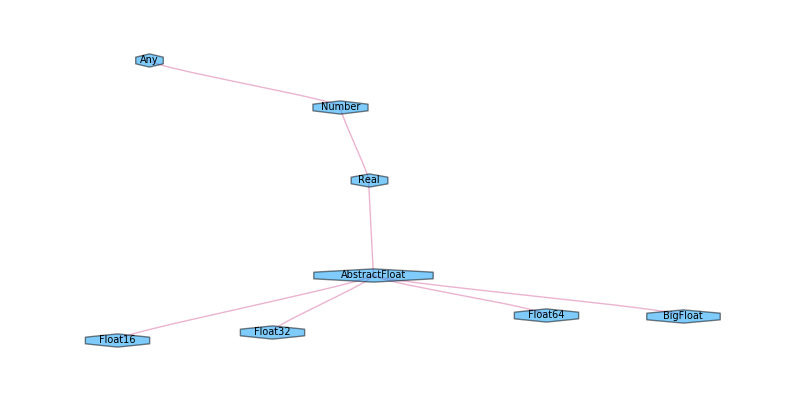

In [19]:
# make a list of a type T and it's supertypes
T = AbstractFloat
sups = [T]
sup = T
while sup != Any
    sup = supertype(sup)
    unshift!(sups,sup)
end
n = length(sups)
nodes, source, destiny = copy(sups), collect(1:n-1), collect(2:n)
add_subs!(T, n)
names = map(string, nodes)

graphplot(source, destiny, names=names, method=:tree)

## Overflow and underflow of floating-point number

* For double precision, the range is $\pm 10^{\pm 308}$. In most situations, underflow is preferred over overflow. Overflow causes crashes. Underflow yields zeros or denormalized numbers. 

* E.g., the logit link function is
$$p = \frac{\exp (x^T \beta)}{1 + \exp (x^T \beta)} = \frac{1}{1+\exp(- x^T \beta)}.$$
The former expression can easily lead to `Inf / Inf = NaN`, while the latter expression leads to graceful underflow.

## Catastrophic cancellation

* **Scenario 1**: Addition or subtraction of two numbers of widely different magnitudes: $a+b$ or $a-b$ where $a \gg b$ or $a \ll b$. We loose the precision in the number of smaller magnitude. Consider 
$$\begin{eqnarray*}
    a &=& x.xxx ... \times 2^{30} \\  
    b &=& y.yyy... \times 2^{-30}
\end{eqnarray*}$$
What happens when computer calculates $a+b$? We get $a+b=a$!

In [20]:
a = 1.0 * 2.0^30
b = 1.0 * 2.0^-30
a + b == a

true

* **Scenario 2**: Subtraction of two nearly equal numbers eliminates significant digits.  $a-b$ where $a \approx b$. Consider 
$$\begin{eqnarray*}
    a &=& x.xxxxxxxxxx1ssss  \\
    b &=& x.xxxxxxxxxx0tttt
\end{eqnarray*}$$
The result is $1.vvvvu...u$ where $u$ are unassigned digits.

In [21]:
a = 1.2345678f0
@show bits(a)
b = 1.2345677f0
@show bits(b)
@show a - b, bits(a - b)

bits(a) = "00111111100111100000011001010001"
bits(b) = "00111111100111100000011001010000"
(a - b,bits(a - b)) = (1.1920929f-7,"00110100000000000000000000000000")


(1.1920929f-7,"00110100000000000000000000000000")

* Implications for numerical computation
    - Rule 1: add small numbers together before adding larger ones  
    - Rule 2: add numbers of like magnitude together (paring). When all numbers are of same sign and similar magnitude, add in pairs so each stage the summands are of similar magnitude  
    - Rule 3: avoid substraction of two numbers that are nearly equal

### Algebraic laws

Floating-point numbers may violate many algebraic laws we are familiar with, such associative and distributive laws. See homework problems.

## Further reading

[What every computer scientist should know about floating-point arithmetic](http://hua-zhou.github.io/teaching/biostatm280-2017spring/readings/Goldberg91FloatingPoint.pdf) by David Goldberg.